# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [140]:
# Install the required libraries
!pip install prophet
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached Cython-3.0.11-py2.py3-none-any.whl.metadata (3.2 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.0 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.9.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.9.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.8.0-py3-none-a

In [141]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [182]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

/var/folders/ys/j34f3pms18l5jc7tq2nl1qn00000gp/T/ipykernel_27802/1669825240.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [143]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


<Axes: xlabel='Date', ylabel='Trends'>

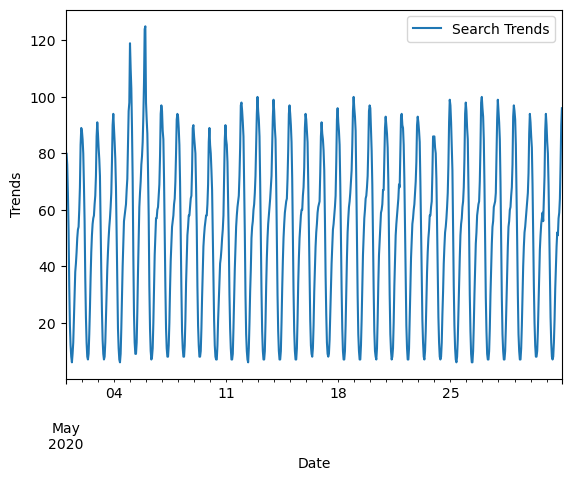

In [144]:
# Slice the DataFrame to just the month of May 2020

df_05_2020 = df_mercado_trends.loc['2020-05']
# Plot to visualize the data for May 2020
df_05_2020.plot(xlabel="Date",ylabel="Trends")

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [145]:
# Calculate the sum of the total search traffic for May 2020
sum_traffic_05_2020 = df_05_2020.sum()

# View the traffic_may_2020 value
#sum_traffic_05_2020 
print(f'search traffic for May 2020: {sum_traffic_05_2020.iloc[0]}')

search traffic for May 2020: 38181


In [146]:
# Calcluate the monhtly median search traffic across all months

# Group the DataFrame by index year and then index month, chain the sum and then the median functions

median_monthly_traffic = df_mercado_trends.groupby(by=[df_mercado_trends.index.year, df_mercado_trends.index.month]).sum().median()

# View the median_monthly_traffic value
print(f'Monthly median search traffic across all months: {median_monthly_traffic}')


Monthly median search traffic across all months: Search Trends    35172.5
dtype: float64


In [147]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
#traffic_may_2020/median_monthly_traffic
print (sum_traffic_05_2020/median_monthly_traffic)


Search Trends    1.085536
dtype: float64


In [148]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
#traffic_may_2020/median_monthly_traffic


print(f'May 2020 had a {(((sum_traffic_05_2020.iloc[0] - median_monthly_traffic.iloc[0]) / median_monthly_traffic.iloc[0]) * 100):.2f}% increase in search traffic compared to the monthly median')

# Compare the seach traffic for the month of May 2020 to the overall monthly median value #traffic_may_2020/median_monthly_traffic print(f'May 2020 had a {(((sum_traffic_05_2020.iloc[0] - median_monthly_traffic.iloc[0]) / median_monthly_traffic.iloc[0])))


      #### It seems you missed the percentage calculation in your code. To compare the search traffic for May 2020 to the overall monthly median value and calculate the percentage increase correctly, you can use the following code:

        # percentage_increase = ((sum_traffic_05_2020.iloc[0] - median_monthly_traffic.iloc[0]) / median_monthly_traffic.iloc[0]) * 100
        # print(f'May 2020 had a {percentage_increase:.2f}% increase in search traffic compared to the monthly median')
        # This code will calculate the percentage increase in search traffic for May 2020 compared to the overall monthly median value and display it with two decimal places.

May 2020 had a 8.55% increase in search traffic compared to the monthly median


##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** May 2020 had a 8.55% increase in search traffic compared to the monthly median

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

<Axes: xlabel='Date'>

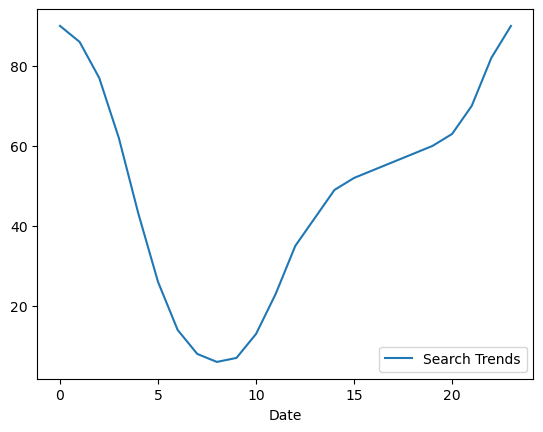

In [149]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`


df_hourly = df_mercado_trends.groupby([df_mercado_trends.index.hour]).median()
df_hourly.plot()

#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

In [150]:
df_mercado_trends.index.isocalendar().day.unique()
## so this array is showing us that in the data frame 3 is the first number that comes up 

<IntegerArray>
[3, 4, 5, 6, 7, 1, 2]
Length: 7, dtype: UInt32

In [151]:
df_mercado_trends.index.isocalendar()
## Iso calendar starts on monday 

,year,week,day
Date,,,
2016-06-01 00:00:00,2016,22,3
2016-06-01 01:00:00,2016,22,3
2016-06-01 02:00:00,2016,22,3
2016-06-01 03:00:00,2016,22,3
2016-06-01 04:00:00,2016,22,3
...,...,...,...
2020-09-07 20:00:00,2020,37,1
2020-09-07 21:00:00,2020,37,1
2020-09-07 22:00:00,2020,37,1


<Axes: xlabel='day'>

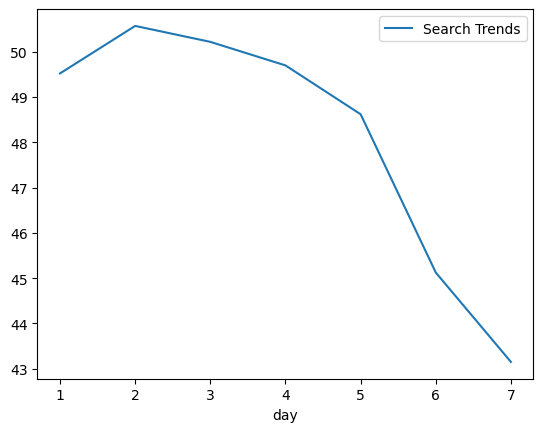

In [152]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.

df_day_of_week = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().day).mean()

# Plot the average traffic by the day of the week
df_day_of_week.plot()

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

<Axes: xlabel='week'>

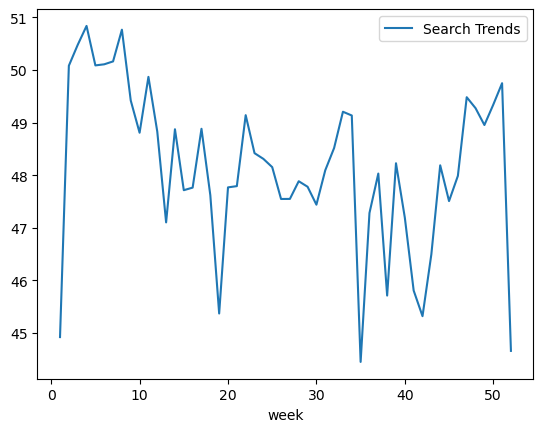

In [153]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.

df_day_of_week = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week).mean()

# Plot the average traffic by the day of the week
df_day_of_week.plot()


In [154]:
df_day_of_week

,Search Trends
week,
1,44.924107
2,50.078869
3,50.474702
4,50.834821
5,50.084821
6,50.105655
7,50.160714
8,50.763393
9,49.417722


##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:** Within the Hourly Week Trends Day 2 (Tuesday) illustrates a spike in trends and it steadily decrease until Sunday (day 7). Within the weekly trends the data illustrates that multiple peaks, for example week 4 has a peak at 50.834821 and at the 35th week there was a dramatic decrease to 44.452381   With respect with the hours, the trend shows the highest around midnight (0). 

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [155]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


<Axes: xlabel='date'>

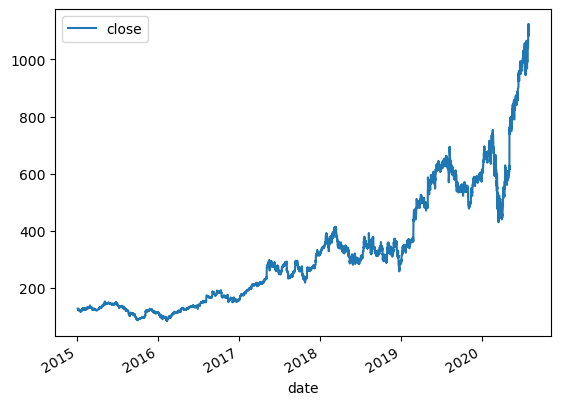

In [156]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.plot()

In [157]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
mercado_stock_trends_df = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()


# View the first and last five rows of the DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())


,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [158]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)

first_half_2020 = mercado_stock_trends_df.loc['2020-01':'2020-06']
# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())

,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


array([<Axes: >, <Axes: >], dtype=object)

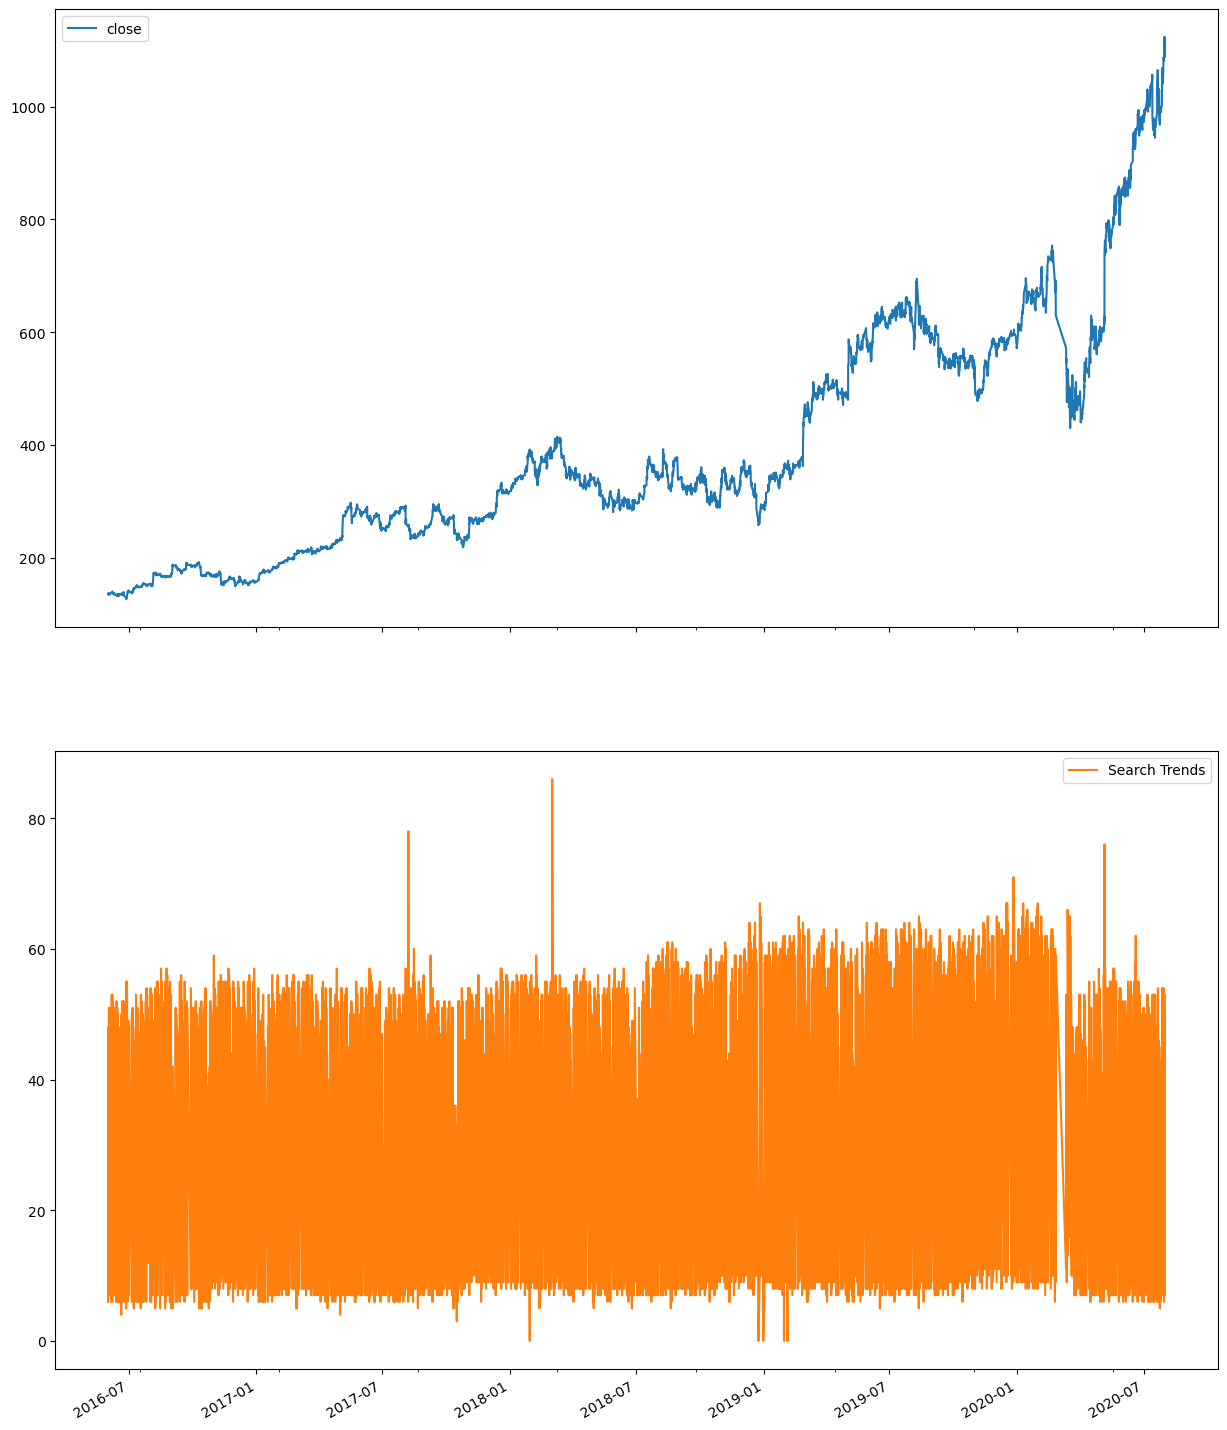

In [159]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
        # To visualize the "close" and "Search Trends" data on separate axes, you can use the plot(subplots=True) syntax in pandas. Here is an example code snippet to achieve this:
        # # Plot each column on a separate axis
        # mercado_stock_trends_df[["close", "Search Trends"]].plot(subplots=True)
        # This code will create a separate plot for each column ("close" and "Search Trends") on different axes. It allows you to visually compare the trends in stock prices and search interest over time.

mercado_stock_trends_df[["close", "Search Trends"]].plot(subplots=True,figsize=(15,20))


##### Answer the following question:

In [160]:
mercado_stock_trends_df

,close,Search Trends
2016-06-01 09:00:00,135.160,6.0
2016-06-01 10:00:00,136.630,12.0
2016-06-01 11:00:00,136.560,22.0
2016-06-01 12:00:00,136.420,33.0
2016-06-01 13:00:00,136.100,40.0
...,...,...
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0


**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** The times series for years has a lot of noise and there does not seem to be any real defining coorelating trends; however, we can see a slight increase in search trends when the market closes on several dates. For example, around peaks at year between 2018/01 and 2018/07  In later part of the graph we can see that stock prices increase despite search trends not increase as much. This is why we havent been able to develop a successful model to predict stock trends. 

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [161]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour

mercado_stock_trends_df["Lagged"]= df_mercado_trends['Search Trends'].shift(periods=1,freq="h")
 ### h must be lowercase 
 
mercado_stock_trends_df.head()

,close,Search Trends,Lagged
2016-06-01 09:00:00,135.16,6.0,5
2016-06-01 10:00:00,136.63,12.0,6
2016-06-01 11:00:00,136.56,22.0,12
2016-06-01 12:00:00,136.42,33.0,22
2016-06-01 13:00:00,136.10,40.0,33


In [162]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
### rolling window compares like jan vs feb 

mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df['close'].pct_change().rolling(window=4).std()

In [163]:
mercado_stock_trends_df['close'].pct_change().rolling(window=4).std()
## this is just to show what we are looking at like compare Jan to April shifting it down by 4

2016-06-01 09:00:00         NaN
2016-06-01 10:00:00         NaN
2016-06-01 11:00:00         NaN
2016-06-01 12:00:00         NaN
2016-06-01 13:00:00    0.006134
                         ...   
2020-07-31 11:00:00    0.012837
2020-07-31 12:00:00    0.013549
2020-07-31 13:00:00    0.013295
2020-07-31 14:00:00    0.013001
2020-07-31 15:00:00    0.013566
Name: close, Length: 7067, dtype: float64

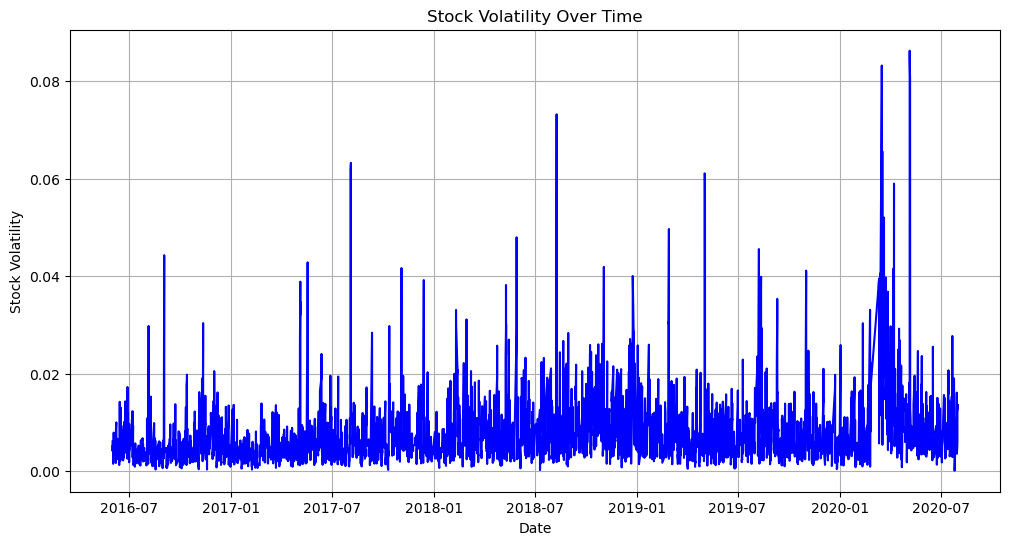

In [164]:
# Visualize the stock volatility

plt.figure(figsize=(12, 6))
plt.plot(mercado_stock_trends_df['Stock Volatility'], color='blue')
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Volatility')
plt.grid(True)
plt.show()

**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [165]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price

mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df['close'].pct_change()

In [166]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())

,close,Search Trends,Lagged,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,5,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,12,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,22,NaN,-0.001025
2016-06-01 13:00:00,136.10,40.0,33,0.006134,-0.002346


,close,Search Trends,Lagged,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32.0,20,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41.0,32,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47.0,41,0.013001,0.013552
2020-07-31 15:00:00,1122.510,53.0,47,0.013566,0.010678


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [167]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
mercado_stock_trends_df[['Stock Volatility', 'Lagged', 'Hourly Stock Return']].corr()

,Stock Volatility,Lagged,Hourly Stock Return
Stock Volatility,1.000000,-0.189173,0.061424
Lagged,-0.189173,1.000000,-0.022829
Hourly Stock Return,0.061424,-0.022829,1.000000


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:**Based on the correlation values provided:

>The correlation between Stock Volatility and Lagged Search Trends is -0.148938, 
indicating a weak negative relationship between the two variables.
>The correlation between Lagged Search Trends and Hourly Stock Return is 0.017929, suggesting a very weak positive relationship between these variables.
>The correlation between Stock Volatility and Hourly Stock Return is 0.061424, indicating a weak positive relationship between these two variables.

>Overall, based on these correlation values, there is no strong or predictable relationship between the lagged search traffic and either the stock volatility or the stock price returns.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [168]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index

mercado_prophet_df = df_mercado_trends.reset_index()
# Label the columns ds and y so that the syntax is recognized by Prophet
mercado_prophet_df.columns = ['ds', 'y']

# Drop an NaN values from the prophet_df DataFrame

mercado_prophet_df = mercado_prophet_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(mercado_prophet_df.head())
display(mercado_prophet_df.tail())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [169]:
# Call the Prophet function, store as an object
model_mercado_trends = Prophet()

In [170]:
# Fit the time-series model.
model_mercado_trends.fit(mercado_prophet_df)

16:12:30 - cmdstanpy - INFO - Chain [1] start processing
16:12:39 - cmdstanpy - INFO - Chain [1] done processing


In [171]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model_mercado_trends.make_future_dataframe(periods=2000, freq='h')

# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends.tail()

,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [172]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model_mercado_trends.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_mercado_trends.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
39101,2020-11-30 04:00:00,44.820300,30.267125,47.584380,43.814289,45.755896,-5.537028,-5.537028,-5.537028,-4.678139,...,-1.746456,-1.746456,-1.746456,0.887566,0.887566,0.887566,0.0,0.0,0.0,39.283272
39102,2020-11-30 05:00:00,44.819509,15.304153,32.265805,43.813030,45.755651,-21.007444,-21.007444,-21.007444,-20.514583,...,-1.384577,-1.384577,-1.384577,0.891716,0.891716,0.891716,0.0,0.0,0.0,23.812065
39103,2020-11-30 06:00:00,44.818718,3.370437,20.515052,43.811770,45.755405,-32.972400,-32.972400,-32.972400,-32.844667,...,-1.023561,-1.023561,-1.023561,0.895829,0.895829,0.895829,0.0,0.0,0.0,11.846318
39104,2020-11-30 07:00:00,44.817927,-4.547752,12.455017,43.810511,45.755160,-40.243847,-40.243847,-40.243847,-40.478082,...,-0.665669,-0.665669,-0.665669,0.899905,0.899905,0.899905,0.0,0.0,0.0,4.574080
39105,2020-11-30 08:00:00,44.817135,-6.226342,10.501196,43.809251,45.754914,-42.438026,-42.438026,-42.438026,-43.028861,...,-0.313108,-0.313108,-0.313108,0.903943,0.903943,0.903943,0.0,0.0,0.0,2.379109


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


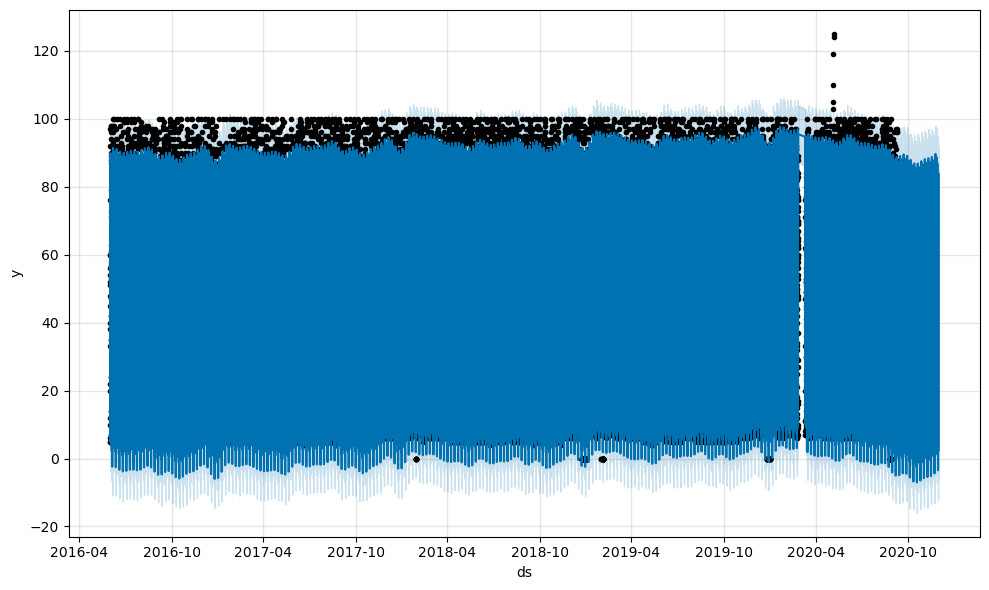

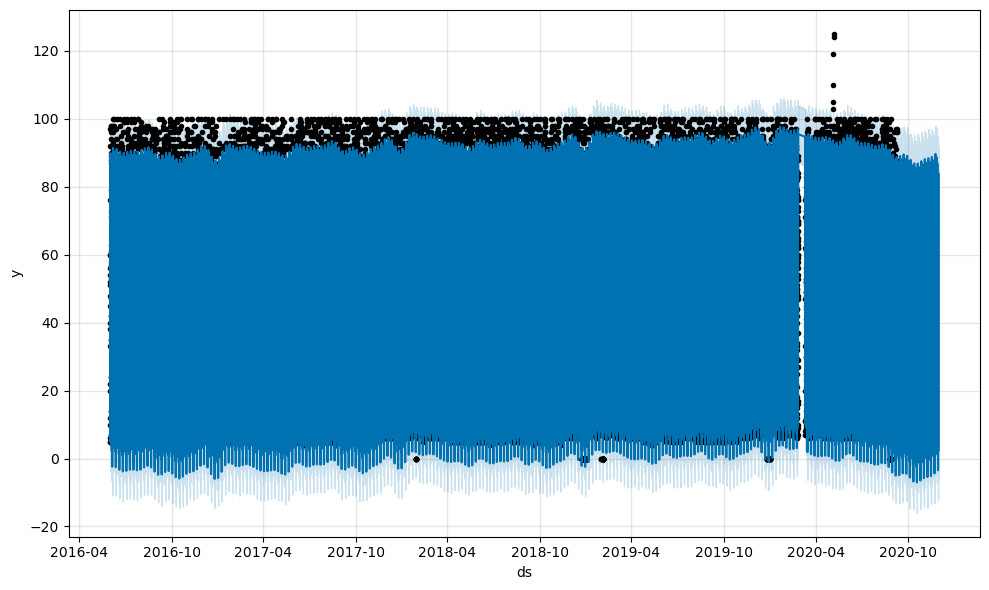

In [173]:
# Plot the Prophet predictions for the Mercado trends data
model_mercado_trends.plot(forecast_mercado_trends)

## regarding warning: This warning is indicating that the behavior of to_pydatetime is deprecated and will change in a future version of the library.
    # While this warning should not affect the functionality of the plot, it's always a good practice to keep your libraries up to date to avoid any potential issues in the future.

In [174]:
# Filter the forecasted dataframe for the specified date range
forecast_range = forecast_mercado_trends[(forecast_mercado_trends['ds'] >= '2020-10-20') & (forecast_mercado_trends['ds'] <= '2020-11-30')]

# Extract the forecasted values for the specified date range
forecast_values = forecast_range[['ds', 'yhat']]

# Print or display the forecasted values for the specified date range
print(forecast_values)


                       ds       yhat
38113 2020-10-20 00:00:00  86.854956
38114 2020-10-20 01:00:00  83.402961
38115 2020-10-20 02:00:00  73.153689
38116 2020-10-20 03:00:00  57.933537
38117 2020-10-20 04:00:00  40.839681
...                   ...        ...
39093 2020-11-29 20:00:00  57.016243
39094 2020-11-29 21:00:00  64.414491
39095 2020-11-29 22:00:00  73.134133
39096 2020-11-29 23:00:00  80.678777
39097 2020-11-30 00:00:00  83.990160

[985 rows x 2 columns]


##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**  Assuming that the black dots represent the data, the historical data has exceeded the predictions, does not fall below. The near term trend between 2020_4 (April) and 2020_10 (October) shows a steady slight decrease. However if you look at the data slighly beyond 2020_10 (October) for example between October and November 30, 2020 there is an uptick in trends. We can better see November data with the code listed above. 


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [175]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
    #Not Needed code forecast_mercado_trends = forecast_mercado_trends.set_index('ds')
## print(forecast_mercado_trends.index.name) ds is ALREADY the index 

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_mercado_trends.columns
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].head()


,yhat,yhat_lower,yhat_upper
0,89.558555,81.193777,97.827988
1,86.005386,77.593204,94.145843
2,75.682942,67.019840,84.199760
3,60.416789,51.435088,68.415986
4,43.302997,35.157103,51.828338


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

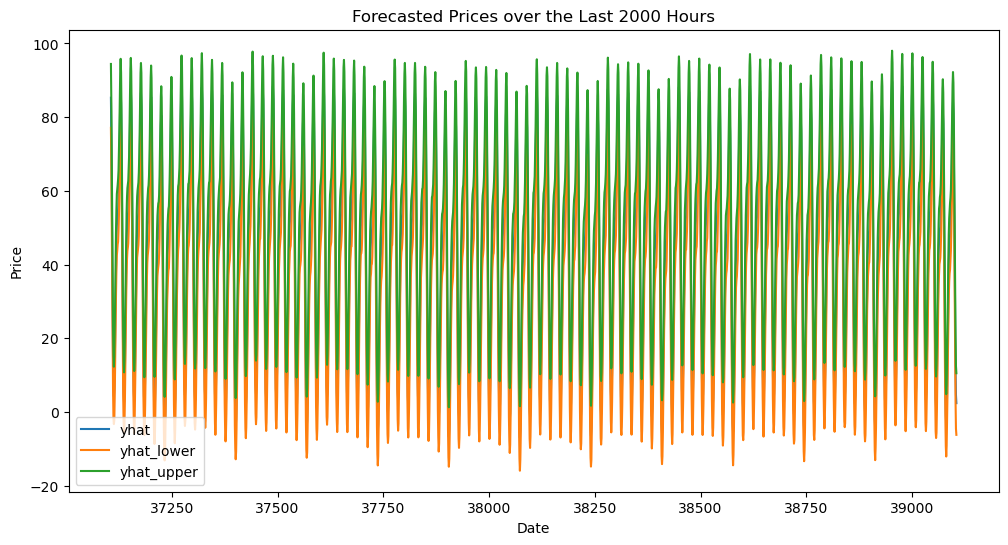

In [176]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours

forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-2000:].plot(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Forecasted Prices over the Last 2000 Hours')
plt.show()

In [181]:

# It seems like you're working on analyzing time series data using the Prophet library. To plot the components of the forecasted data and use the isocalendar function, you can follow these steps:

# Plot the components of the forecasted data for the Mercado Trends model using the plot_components function:
# model_mercado_trends.plot_components(forecast_mercado_trends)
# If you want to use the isocalendar function to further analyze the data, you can first reset the index of the forecast DataFrame and then apply the isocalendar function to extract components like week, year, and weekday:
# forecast_mercado_trends.reset_index(inplace=True)
# forecast_mercado_trends['week'] = forecast_mercado_trends['ds'].dt.isocalendar().week
# forecast_mercado_trends['year'] = forecast_mercado_trends['ds'].dt.isocalendar().year
# forecast_mercado_trends['weekday'] = forecast_mercado_trends['ds'].dt.isocalendar().day
# By resetting the index and extracting these components using isocalendar, you can further analyze and visualize the time series data based on weeks, years, and weekdays.

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. 

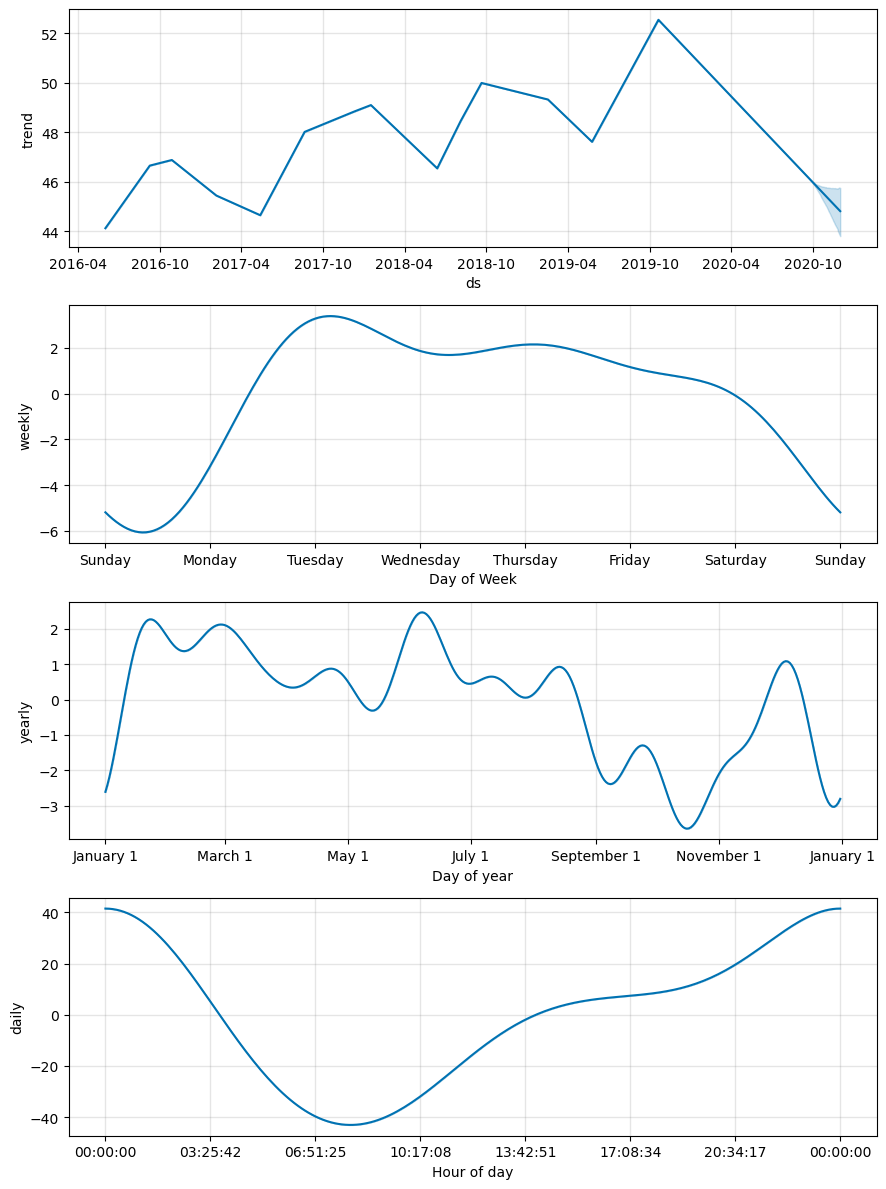

In [180]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends = forecast_mercado_trends.reset_index(drop=True)


# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
figures_mercado_trends = model_mercado_trends.plot_components(forecast_mercado_trends)

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** Midnight (00:00:00) exhibits the greatest popularity the graph shows on both sides. Additionally a steady increase from 20:34:17 to 00:00:00 the most popular time is displayed.

**Question:** Which day of week gets the most search traffic?
   
**Answer:** Tuesday

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** Roughly towards the end of September into October. 


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. 

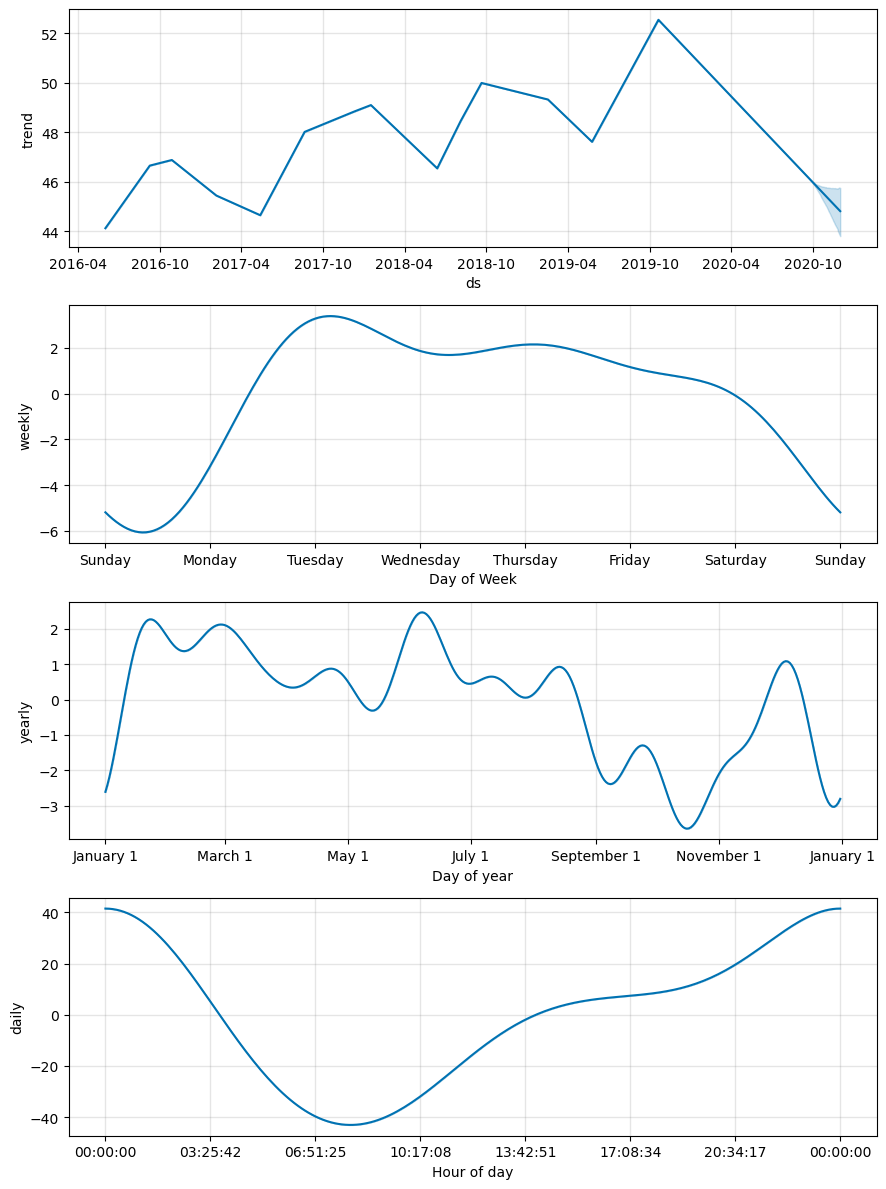

In [ ]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends = forecast_mercado_trends.reset_index(drop=True)


# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
figures_mercado_trends = model_mercado_trends.plot_components(forecast_mercado_trends)